<a href="https://colab.research.google.com/github/FernandoAbarca/RETO-/blob/main/DS_C3_SC1_HUGO_FERNANDO_ABARCA_JIMENEZ_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NOMBRE DEL PARTICIPANTE: HUGO FERNANDO ABARCA JIMENEZ

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [ ]:
happiness=pd.read_csv('/content/drive/MyDrive/practicas data/happiness_report.csv')
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [ ]:
mexico=happiness.loc[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico.index.name='Country or region'
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

In [ ]:
font={'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
value=happiness.loc[happiness['Country or region']=='Mexico','Score']
value=value.to_list()[0]
value

6.595

Text(6.595, 0, 'Mex')

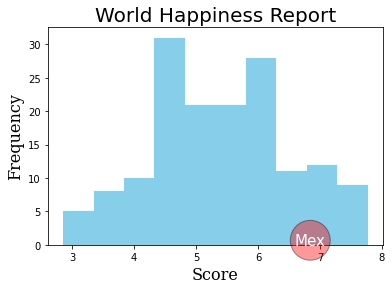

In [ ]:
plt.hist('Score',data=happiness,color='skyblue')
plt.title('World Happiness Report',fontsize=20)
plt.xlabel('Score',fontdict=font)
plt.ylabel('Frequency',fontdict=font)
bbox={'boxstyle':'circle','facecolor':'red','alpha':.4  }
plt.text(value,0,'Mex',bbox=bbox,fontsize=15,color='white')

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

In [ ]:
happiness.loc[happiness['Country or region']=='Mexico','Healthy life expectancy'].to_list()[0] 

0.861

Text(1.2, 0.991, '0.861')

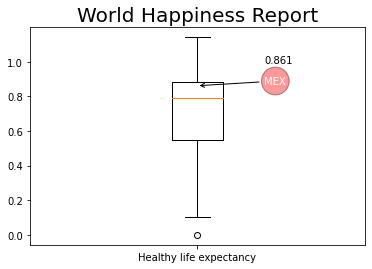

In [ ]:
plt.boxplot(happiness['Healthy life expectancy'].dropna(),labels=['Healthy life expectancy'])
plt.title('World Happiness Report',fontsize=20)
mex_value = happiness.loc[happiness['Country or region']=='Mexico','Healthy life expectancy'].to_list()[0]          
plt.annotate('MEX',xy=(1,mex_value),xytext=(1.2,mex_value+.01),arrowprops=dict(arrowstyle='->',color='black'),bbox=bbox,color='white')
plt.annotate(mex_value,xy=(1,mex_value),xytext=(1.2,mex_value+.13))

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [ ]:
factor=mexico.loc[:,'GDP per capita':].T
factor.columns=['Factors']
factor

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


Text(0.5, 1.0, 'Contribution in Mexico happiness score')

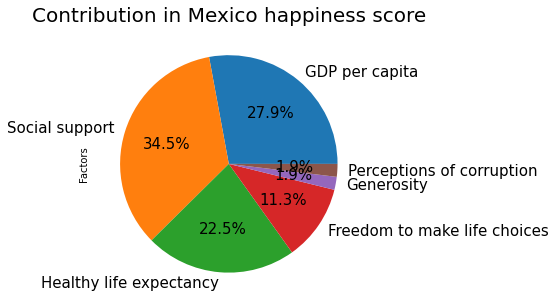

In [ ]:
factor.plot.pie(y='Factors',labels=factor.index,autopct='%1.1f%%',rotatelabels=False,figsize=(5,5),legend=False,fontsize=15)
plt.title('Contribution in Mexico happiness score',fontsize=20)



7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [ ]:

x=happiness[(happiness['Country or region']=='Mexico')|(happiness['Score']==happiness['Score'].min())|(happiness['Score']==happiness['Score'].max())|(happiness['Country or region'].isin(['Tanzania','Iceland']))]
x.set_index('Country or region',inplace=True)
x.index.name=''
x=x.loc[:,'GDP per capita':]
x=x.T
x


,Finland,Iceland,Mexico,Tanzania,South Sudan
GDP per capita,1.340,1.380,1.070,0.476,0.306
Social support,1.587,1.624,1.323,0.885,0.575
Healthy life expectancy,0.986,1.026,0.861,0.499,0.295
Freedom to make life choices,0.596,0.591,0.433,0.417,0.010
Generosity,0.153,0.354,0.074,0.276,0.202
Perceptions of corruption,0.393,0.118,0.073,0.147,0.091


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'GDP per capita'),
  Text(1, 0, 'Social support'),
  Text(2, 0, 'Healthy life expectancy'),
  Text(3, 0, 'Freedom to make life choices'),
  Text(4, 0, 'Generosity'),
  Text(5, 0, 'Perceptions of corruption')])

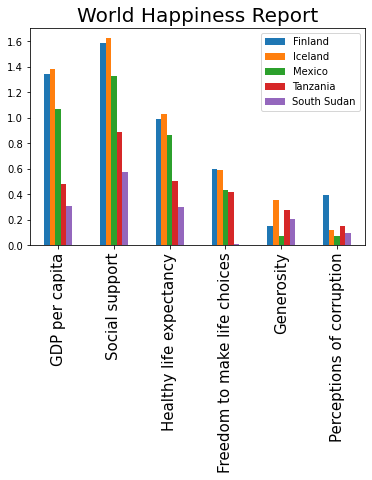

In [ ]:
x.plot(kind='bar')
plt.title('World Happiness Report',fontsize=20)
plt.xticks(fontsize=15)


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

In [ ]:
y=happiness.drop(['Country or region'],axis=1)
y

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<Axes: xlabel='Score', ylabel='Perceptions of corruption'>

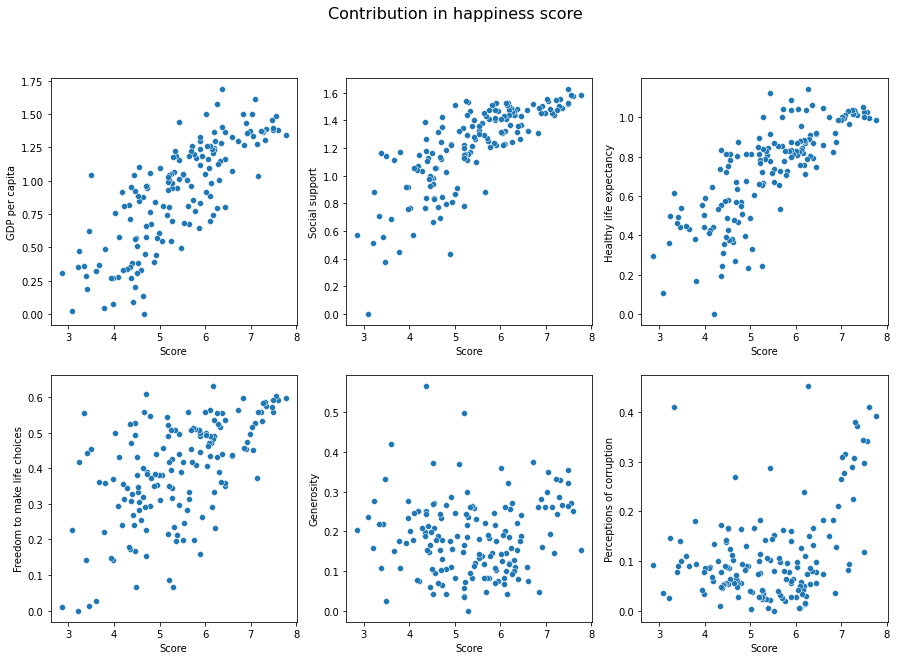

In [ ]:
fig,axs=plt.subplots(2,3,figsize=(15,10))
fig.suptitle('Contribution in happiness score',fontsize=16)
sns.scatterplot(x=y['Score'],y=y['GDP per capita'],ax=axs[0,0])
sns.scatterplot(x=y['Score'],y=y['Social support'],ax=axs[0,1])
sns.scatterplot(x=y['Score'],y=y['Healthy life expectancy'],ax=axs[0,2])
sns.scatterplot(x=y['Score'],y=y['Freedom to make life choices'],ax=axs[1,0])
sns.scatterplot(x=y['Score'],y=y['Generosity'],ax=axs[1,1])
sns.scatterplot(x=y['Score'],y=y['Perceptions of corruption'],ax=axs[1,2])

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<Axes: >

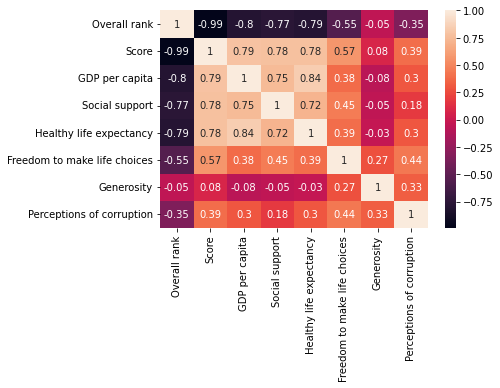

In [ ]:
sns.heatmap(round(y.corr(),2),annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

In [ ]:
meta=pd.read_csv('/content/drive/MyDrive/data/Metadata (1).csv')
meta

In [ ]:
j=pd.concat([happiness,meta],axis=1)
j.dropna(axis=0,subset=['Score'],inplace=True)
j.dropna(axis=0,subset=['Region'],inplace=True)
j=j[['Score','Region']].groupby('Region').mean()
j

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'East Asia & Pacific'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Latin America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

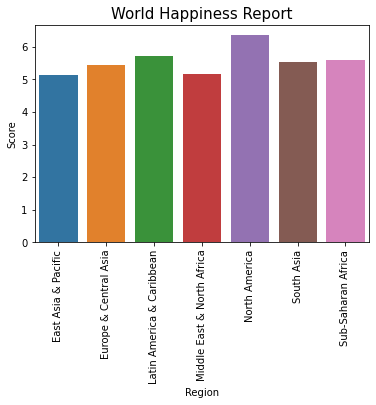

In [ ]:
sns.barplot(x=j.index,y='Score',data=j)
plt.title('World Happiness Report',fontsize=15)
plt.xticks(rotation=90)